# Translating droplet verification case


![title](notebook-figures/translating-droplet-3D-standalone-1.png)

A droplet is translated in a rectangular domain using a spatially constant internal and inlet velocity field. 

## Tests 

### 1 Translating droplet with varying density ratios without viscosity and surface tension 

#### Goal: Ensure the advection of the interface is consistent with the advection of the momentum

$\nabla \cdot(\rho \mathbf{v} \mathbf{v})$. To ensure this, the density in the new time step $\rho^{n+1}$ must be updated using the same flux $\rho_f^k \mathbf{v}_f^k \cdot \mathbf{S}_f$ that is used in the convective term of the momentum equation. See literature on multiphase momentum transport for varying density ratios. For this test case, viscosity and surface tension are set to $0$. 

In  other words, there should be no change in the mixture velocity if the mass flux in the momentum equation is also used to update the mixture density and of course the pressure stays the same $p=0$. 

### 2 Translating droplet with varying density ratios 

#### Ensure the forces are balanced on the interface for an interface that moves in the simplest way - by translation

This is tested in the case where kinematic viscosity is $\nu \ne 0$ and the surface tension force $\mathbf{f}_\sigma \ne \mathbf{0}$.

# 1 Translating droplet with varying density ratios without viscosity and surface tension 

In [3]:
import notebookPlotting 
import pandas as pd
import dataAgglomeration as datglom 
from notebookPlotting import plot_dframe
from matplotlib import rcParams

rcParams["figure.dpi"] = 200

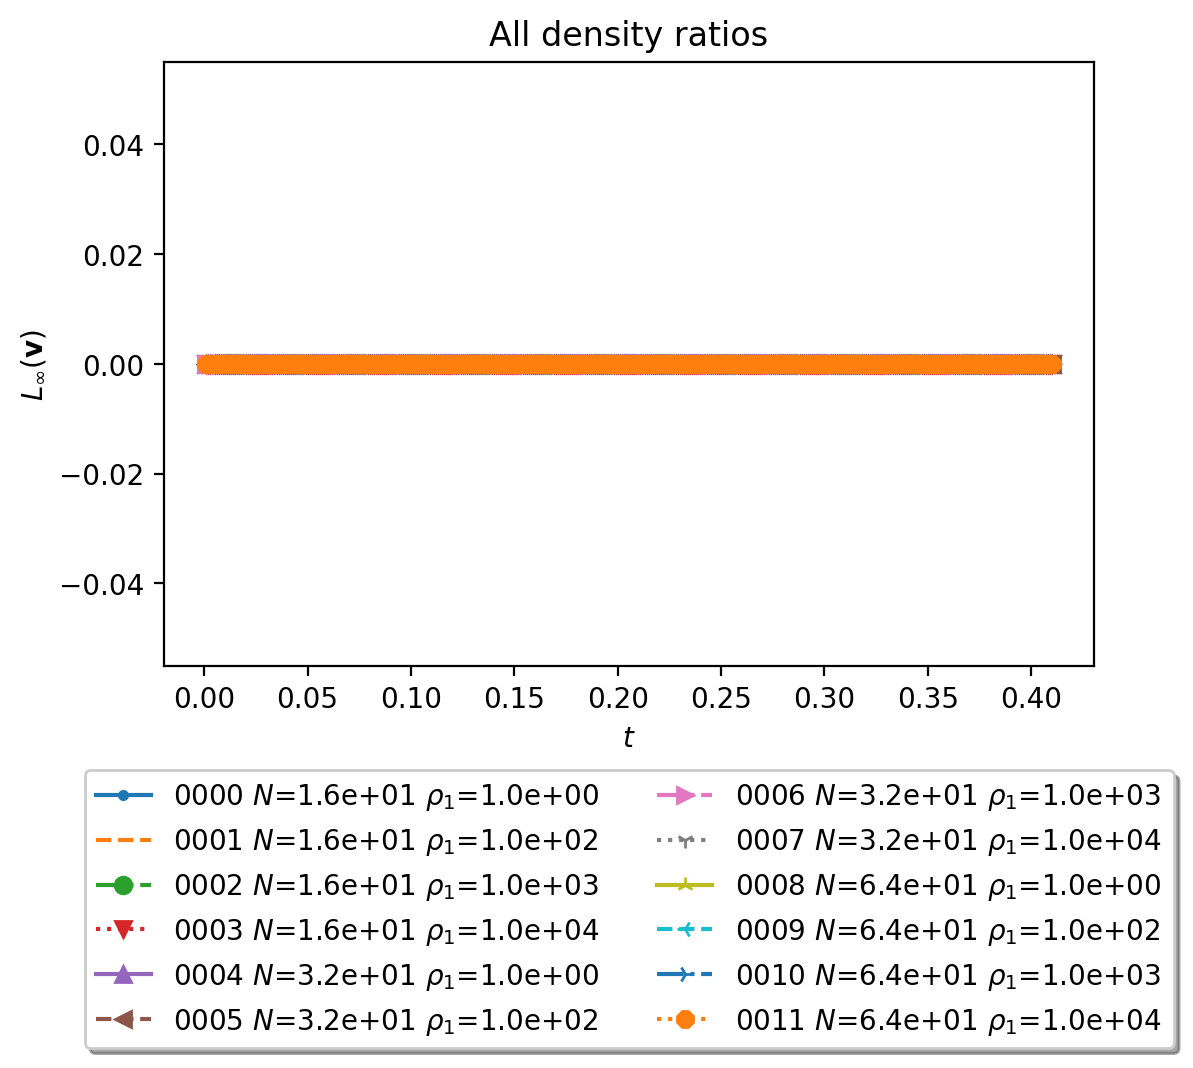

In [4]:
densityRatioAgglom  = datglom.data_agglomerator("densityRatioInfluence.parameter", 
                                                "densityRatioInfluence.parameter_00000_template_copy_block",
                                                "stationaryDropletResults.csv") 

densityRatioDframe = densityRatioAgglom.study_dataframe() 

plotDict={"x" : "time", "xsymb" : r"$t$", 
          "y" : "Linf velocity error", 
          "ysymb" : r"$L_\infty(\mathbf{v})$",
          "resolution" : r"$N$", "rho_droplet" : r"$\rho_1$", 
          "nu_droplet" : r"$\nu_1$"};
plot_dframe(densityRatioDframe, densityRatioAgglom, 
            title="All density ratios", 
            plotDict=plotDict, ncol=2)

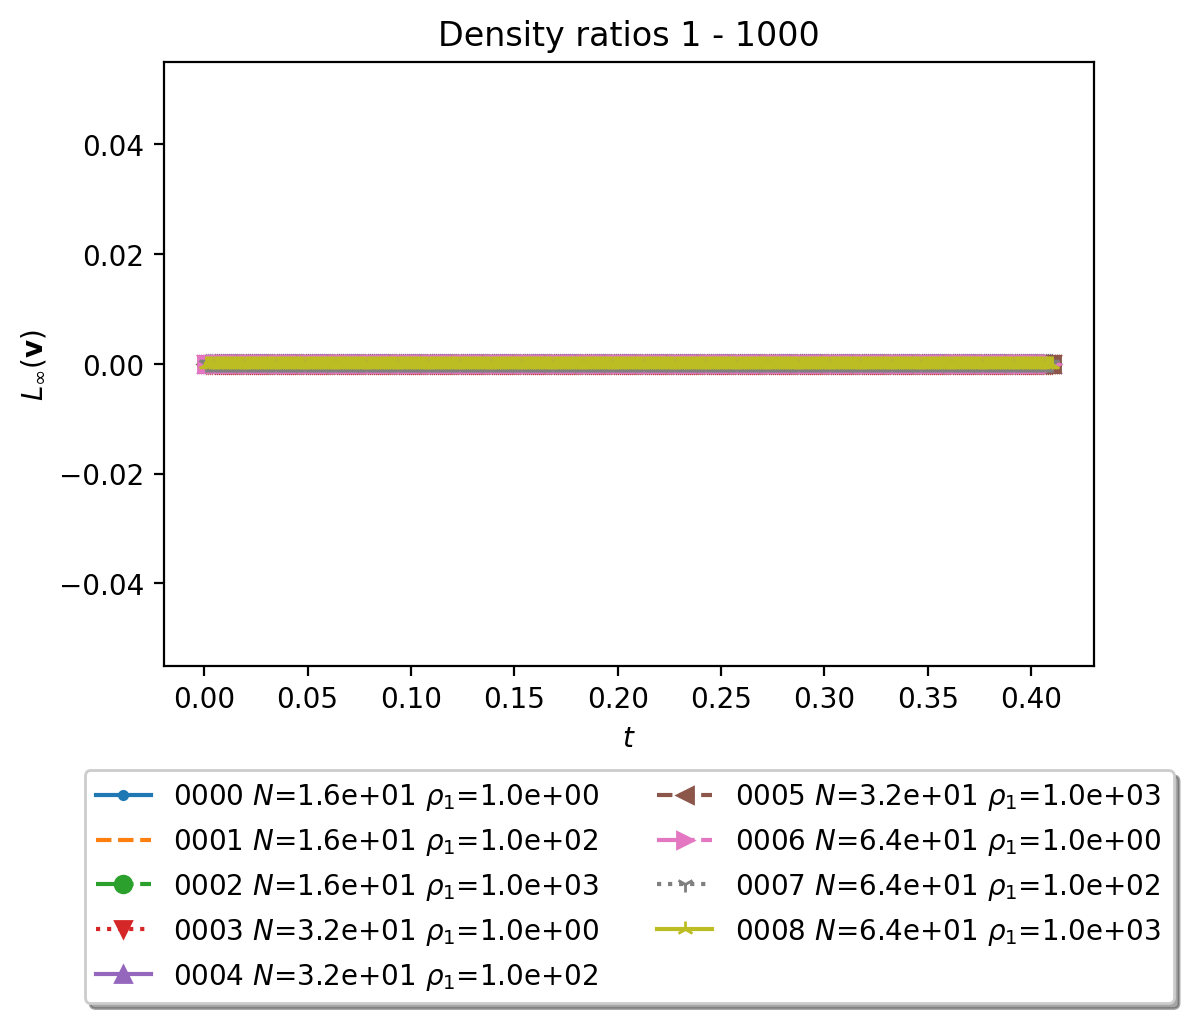

In [5]:
idx = pd.IndexSlice
plot_dframe(densityRatioDframe.loc[idx[[16,32,64],[1,100,1000],:]], densityRatioAgglom, 
            title="Density ratios 1 - 1000", 
            plotDict=plotDict)

# 2 Translating droplet with varying density ratios, viscosity and surface tension

Popinet, Stéphane., "An accurate adaptive solver for surface-tension-driven
interfacial flows.", Journal of Computational Physics 228.16 (2009): 5838-5866.                                                                                                                            

Abadie, Thomas, Joelle Aubin, and Dominique Legendre, "On the combined effects
of surface tension force calculation and interface advection on spurious
currents within Volume of Fluid and Level Set frameworks." Journal of
Computational Physics 297 (2015): 611-636.           

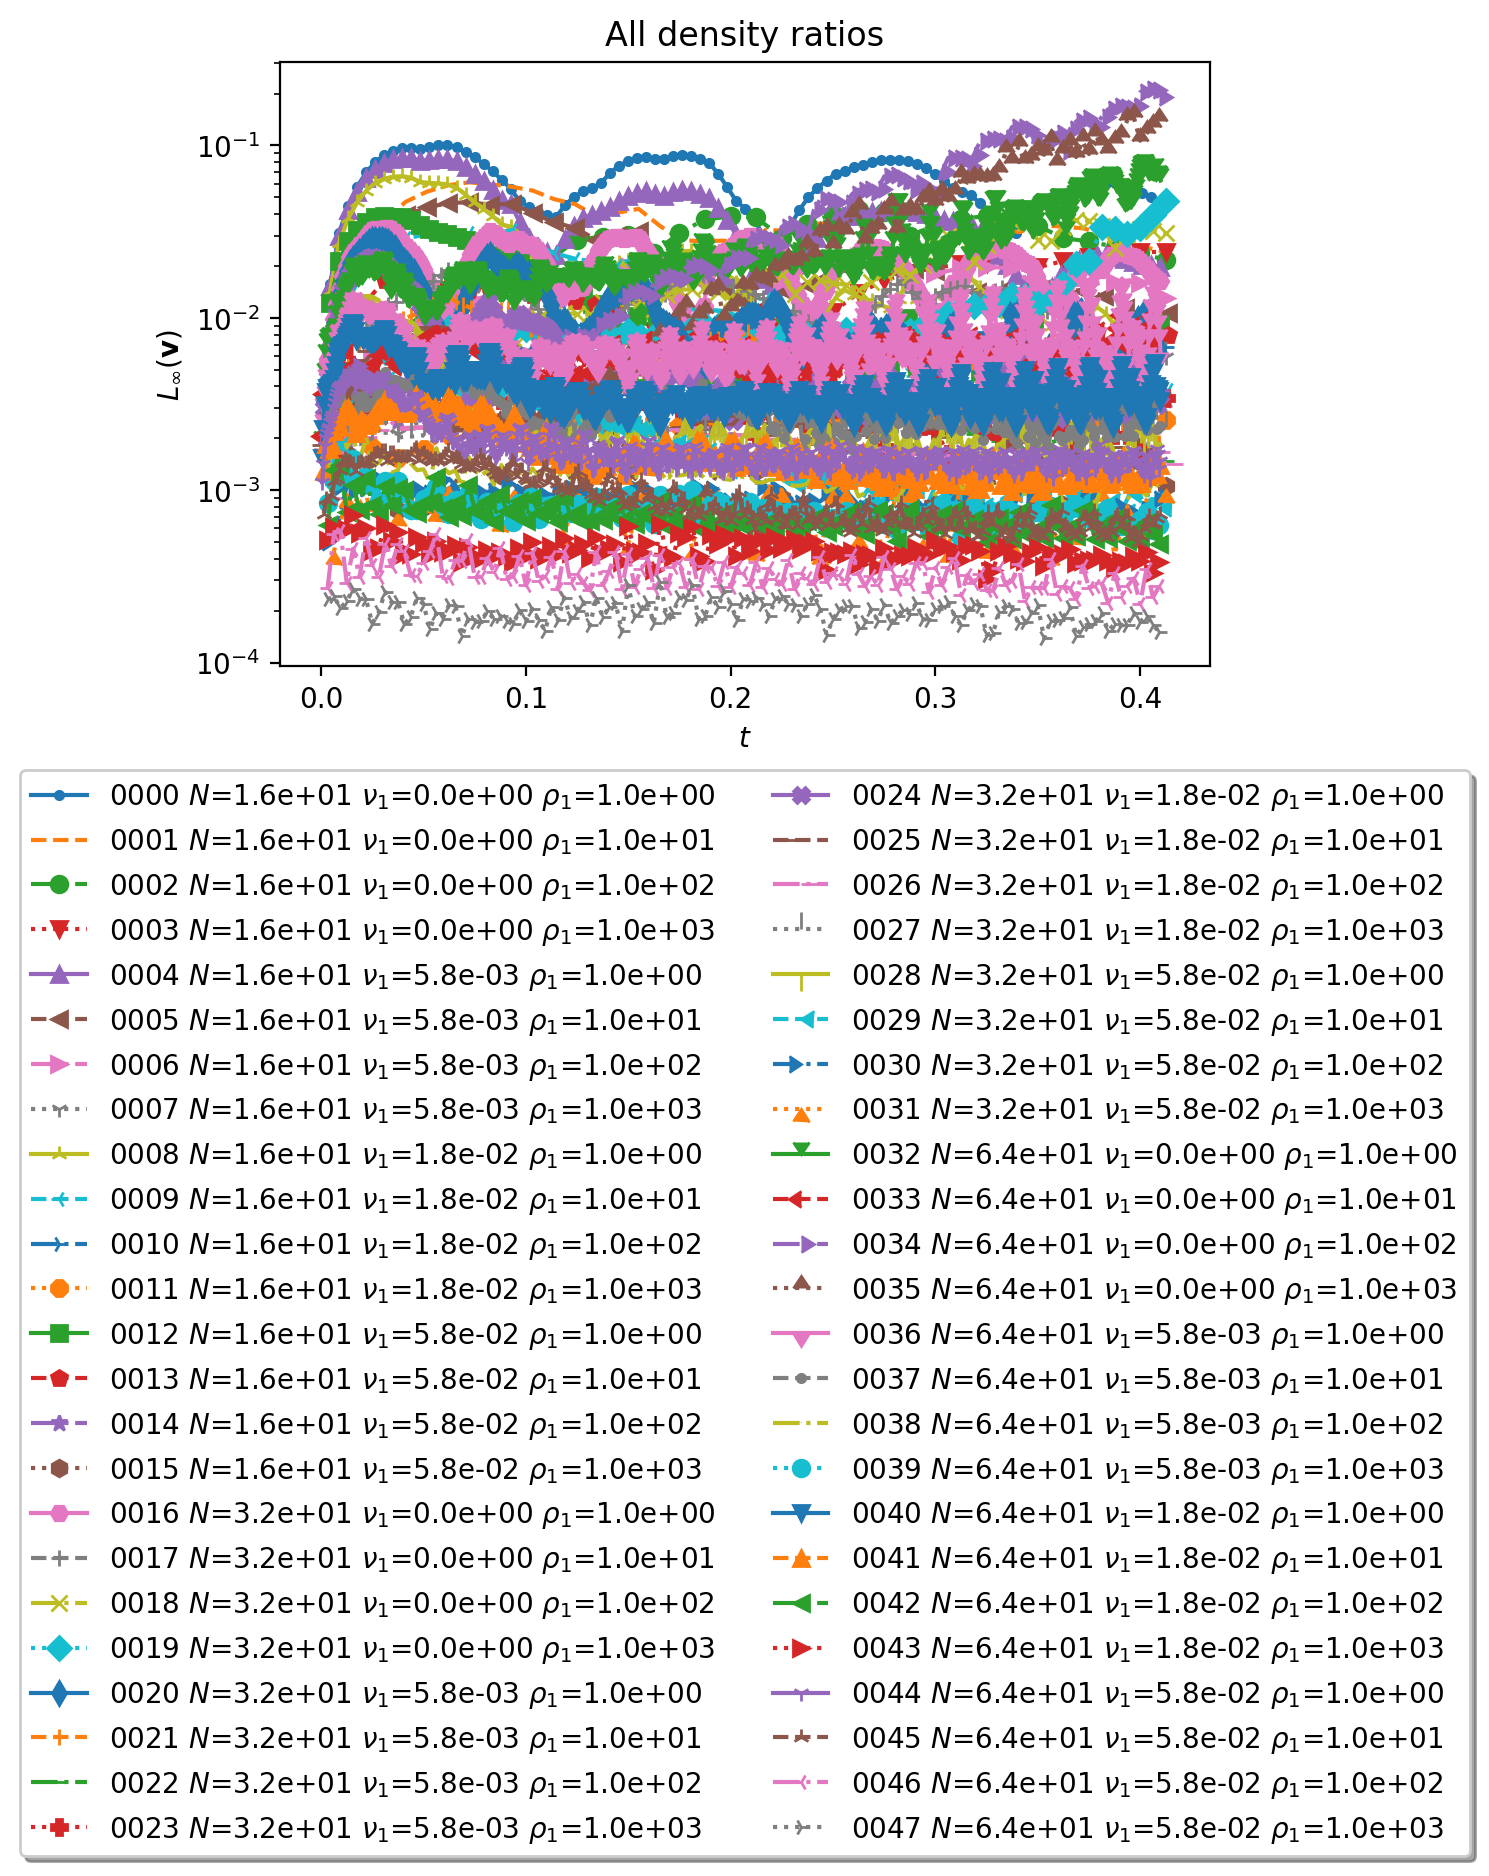

In [6]:
popinet2009Agglom  = datglom.data_agglomerator("popinet2009.parameter", 
                                               "popinet2009.parameter_00000_template_copy_block",
                                               "stationaryDropletResults.csv") 

popinet2009Dframe = popinet2009Agglom.study_dataframe() 

plot_dframe(popinet2009Dframe, popinet2009Agglom, 
            title="All density ratios", 
            plotDict=plotDict)

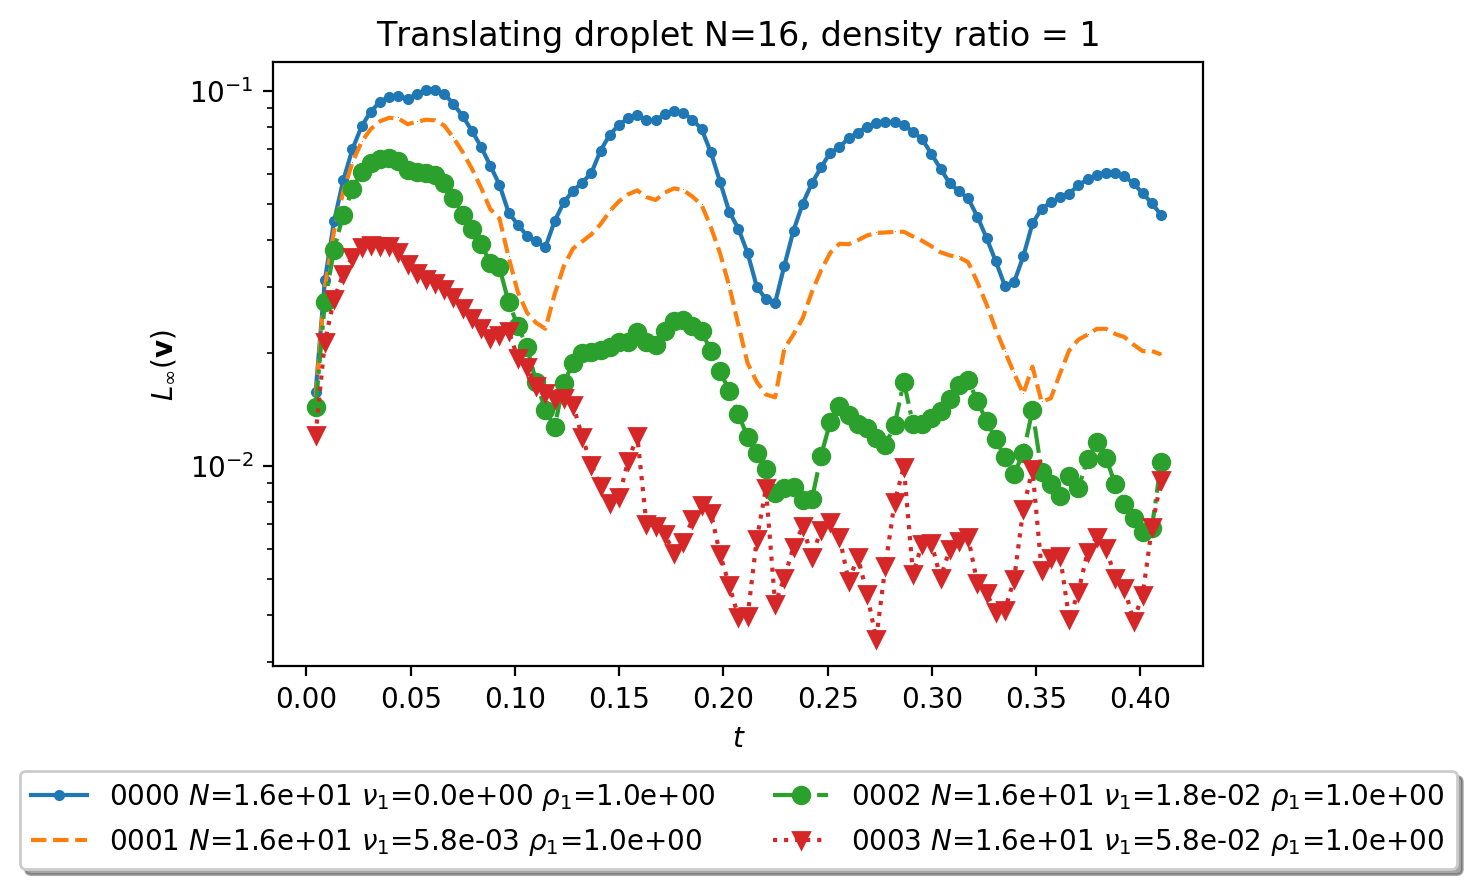

In [13]:
idx = pd.IndexSlice
plot_dframe(popinet2009Dframe.loc[idx[[16],:,[1],:]],
            popinet2009Agglom,
            title="Translating droplet N=16, density ratio = 1", 
            plotDict=plotDict)

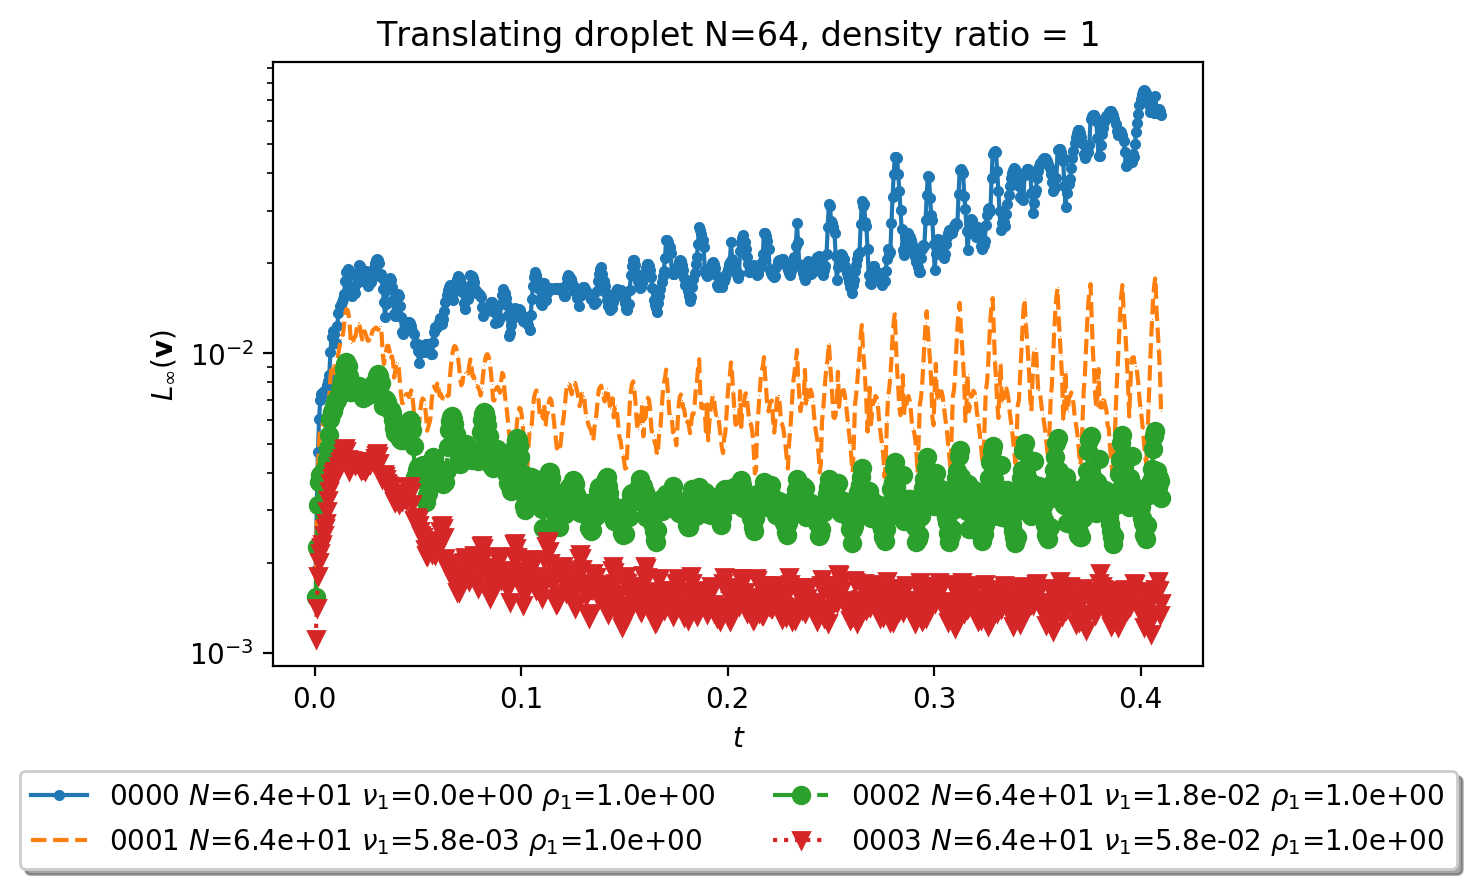

In [11]:
plot_dframe(popinet2009Dframe.loc[idx[[64],:,[1],:]],
            popinet2009Agglom,
            title="Translating droplet N=64, density ratio = 1", 
            plotDict=plotDict)

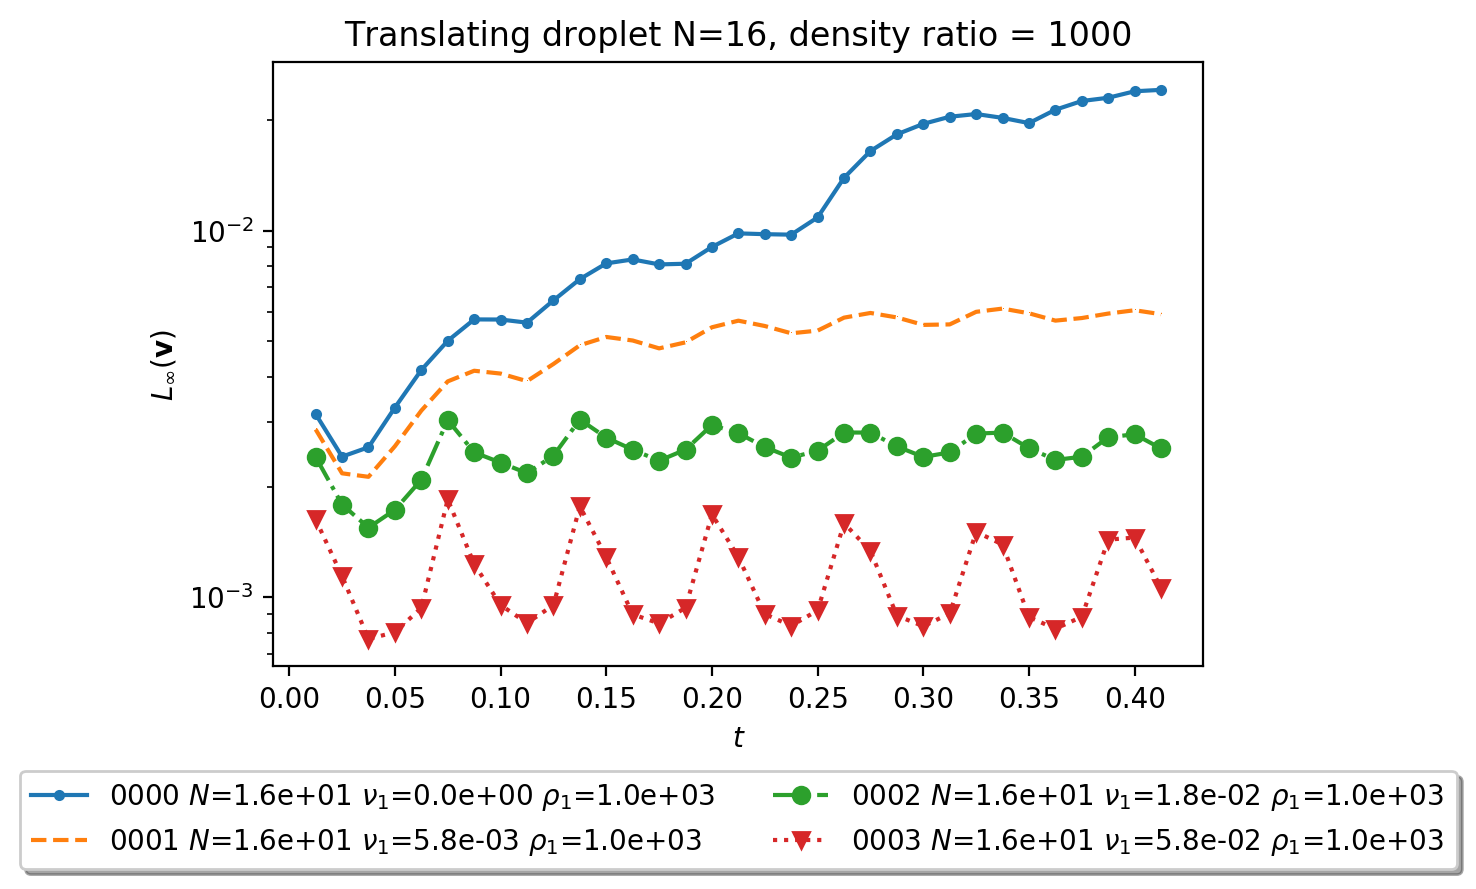

In [14]:
idx = pd.IndexSlice
plot_dframe(popinet2009Dframe.loc[idx[[16],:,[1000],:]],
            popinet2009Agglom,
            title="Translating droplet N=16, density ratio = 1000", 
            plotDict=plotDict)

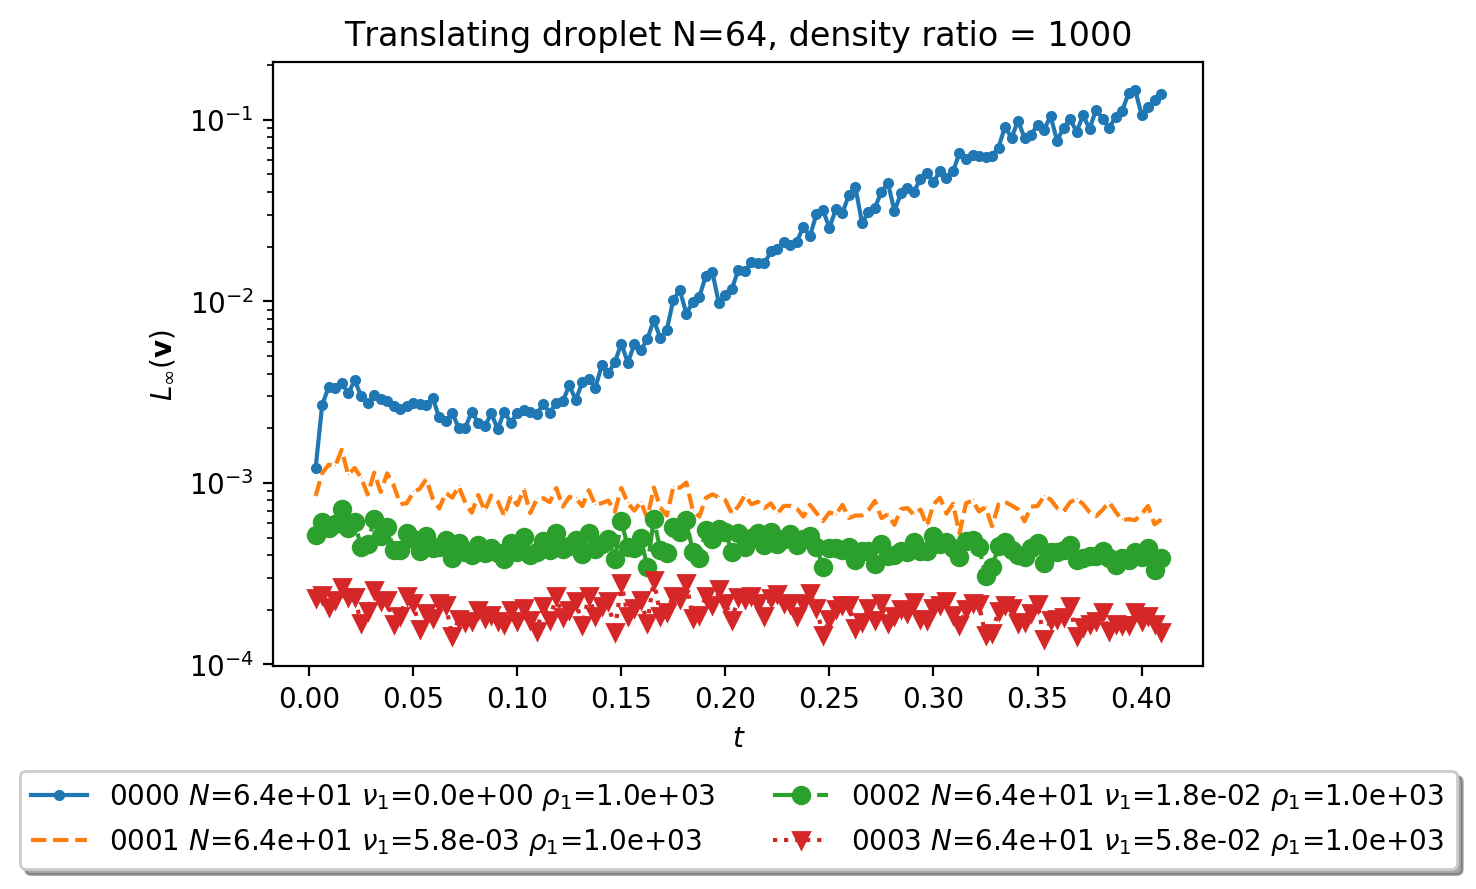

In [16]:
idx = pd.IndexSlice
plot_dframe(popinet2009Dframe.loc[idx[[64],:,[1000],:]],
            popinet2009Agglom,
            title="Translating droplet N=64, density ratio = 1000", 
            plotDict=plotDict)